# FFT

We know that the FFT transforms our time-domain signal into the frequency domain. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets. To compute a Fourier transform we use scipy.fft

In [1]:
from scipy.fftpack import fft
import numpy as np 
import matplotlib.pyplot as plt
import librosa, librosa.display
import pandas as pd
import os
import wave
import IPython.display as ipd # plays a file within notebook
import glob
from scipy.io import wavfile

import random 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')

In [2]:
os.chdir('../') # change to main dir

In [3]:
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[i]*np.sin(2*np.pi*frequencies[i]*x_value) for i in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

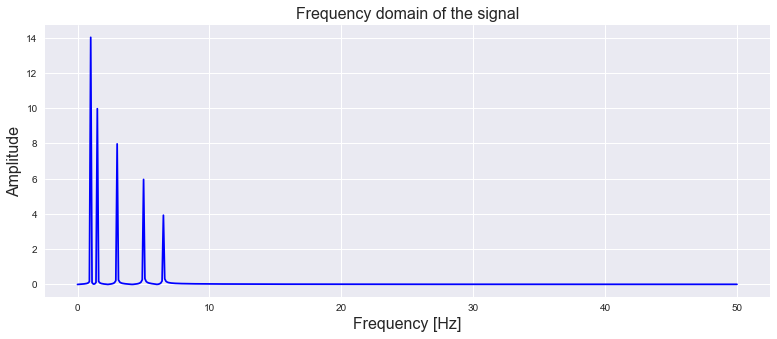

In [4]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
  
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
plt.figure(figsize=(13, 5))
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

A classical FFT should show the above frequency jumps if the signal repeats itself 

In [5]:
composite_y_value.shape, x_value.shape, len(y_values)

((1000,), (1000,), 5)

## Sound FFT 


The approach of using the Fourier Transform will work very well when the frequency spectrum is stationary. That is, the frequencies present in the signal are not time-dependent; if a signal contains a frequency of x Hz this frequency should be present equally anywhere in the signal. The more non-stationary/dynamic a signal is, the worse the results will be. 

In [28]:
train_list = pd.read_csv('data/train.csv')
rnd = random.choice(np.where(train_list.label == 'Hi-hat')[0])
rnd_file = train_list.fname[rnd]
file = os.path.join('data/audio_train/', rnd_file)
#file = 'sample_audios/f40e1c0b.wav'

x, sr = librosa.load(file)
print('sample rate:', sr)

sample rate: 22050


Text(0.5, 1.0, 'Raw Signal')

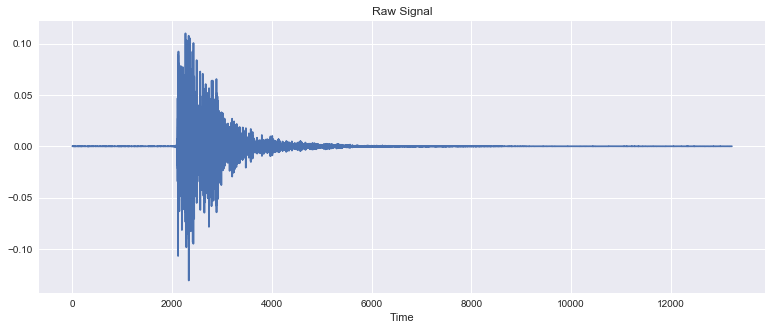

In [29]:
plt.figure(figsize=(13, 5))
plt.plot(x)
plt.xlabel('Time')
plt.title('Raw Signal')

In [30]:
X = fft(x)
X_mag = np.absolute(X)
f = np.linspace(0, sr, len(X_mag)) # frequency variable

Text(0.5, 0, 'Frequency (Hz)')

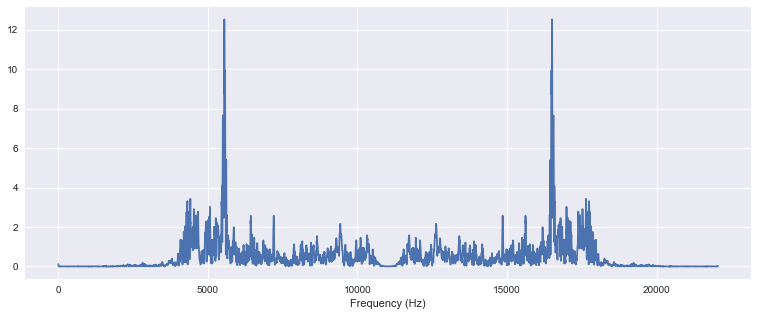

In [31]:
# Plot the spectrum
plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Text(0.5, 0, 'Frequency (Hz)')

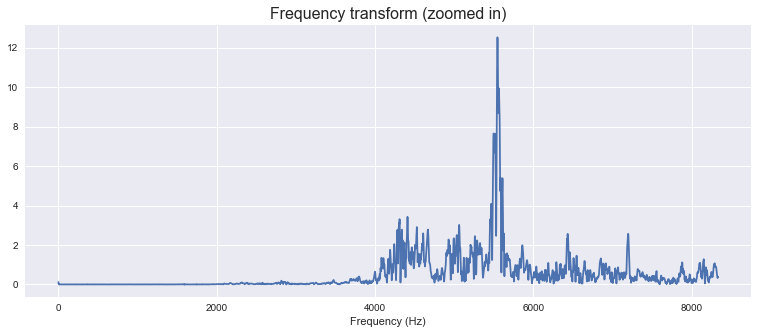

In [34]:
# zooming in to the frequencies
plt.figure(figsize=(13, 5))
plt.plot(f[:5000], X_mag[:5000])
plt.title("Frequency transform (zoomed in)", fontsize=16)
plt.xlabel('Frequency (Hz)')